In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from pickle import dump
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/diabetes_data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EDA

In [3]:
# Information
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [4]:
# Description

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Number or 0's

(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [6]:
# Remove 0's in Blood Pressure, Glucose and BMI

df = df[(df[['BloodPressure', 'Glucose','BMI']] != 0).all(axis=1)]

#print(df)
(df == 0).sum()


Pregnancies                  99
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     475
dtype: int64

### EDA - Analysis of Numerical Variables

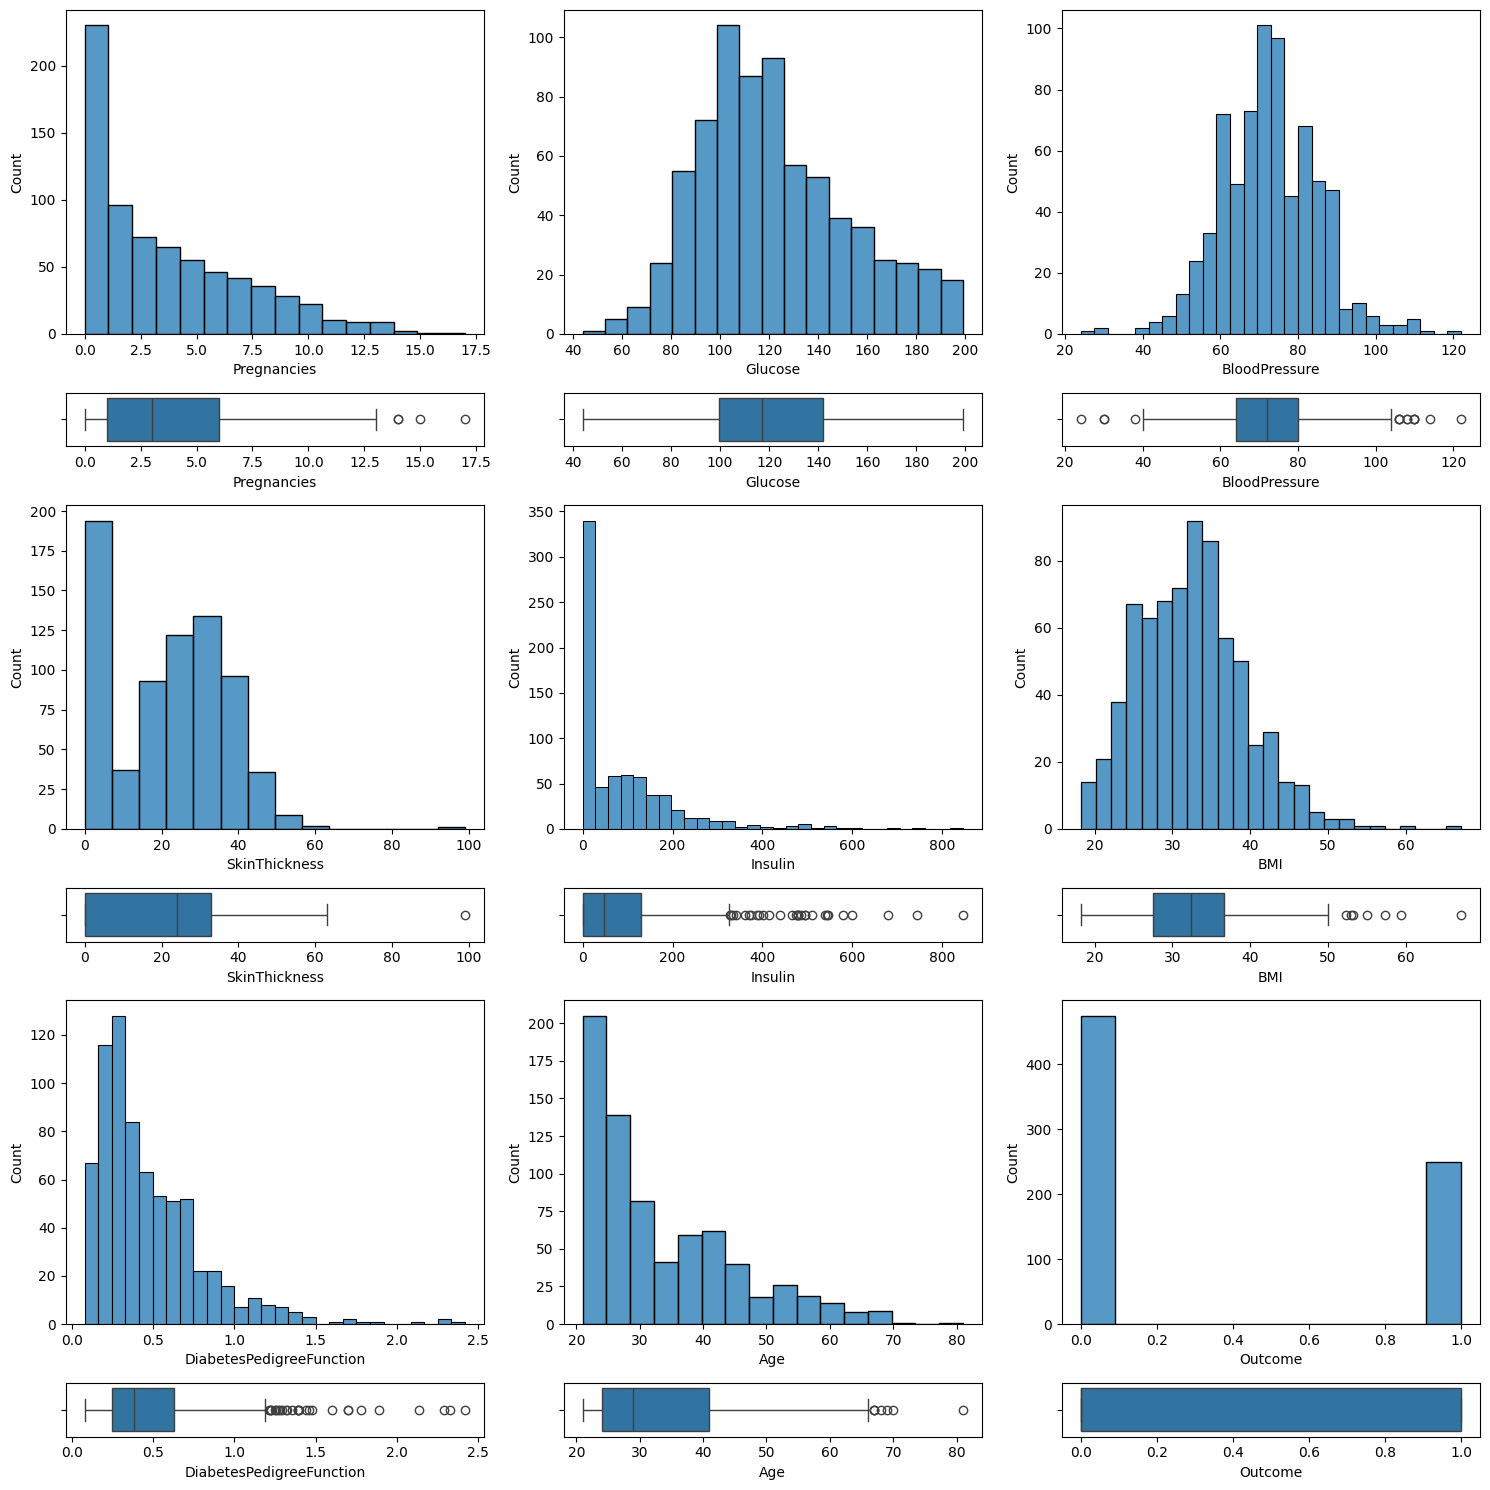

In [7]:
# Analysis of Numerical Variables

fig, axis = plt.subplots(6,3,figsize = (15,15),gridspec_kw={'height_ratios':[6,1,6,1,6,1]})

sns.histplot(ax=axis[0,0], data=df, x='Pregnancies')
sns.boxplot(ax=axis[1,0], data=df, x='Pregnancies')

sns.histplot(ax=axis[0,1], data=df, x='Glucose')
sns.boxplot(ax=axis[1,1], data=df, x='Glucose')

sns.histplot(ax=axis[0,2], data=df, x='BloodPressure')
sns.boxplot(ax=axis[1,2], data=df, x='BloodPressure')

sns.histplot(ax=axis[2,0], data=df, x='SkinThickness')
sns.boxplot(ax=axis[3,0], data=df, x='SkinThickness')

sns.histplot(ax=axis[2,1], data=df, x='Insulin')
sns.boxplot(ax=axis[3,1], data=df, x='Insulin')

sns.histplot(ax=axis[2,2], data=df, x='BMI')
sns.boxplot(ax=axis[3,2], data=df, x='BMI')

sns.histplot(ax=axis[4,0], data=df, x='DiabetesPedigreeFunction')
sns.boxplot(ax=axis[5,0], data=df, x='DiabetesPedigreeFunction')

sns.histplot(ax=axis[4,1], data=df, x='Age')
sns.boxplot(ax=axis[5,1], data=df, x='Age')

sns.histplot(ax=axis[4,2], data=df, x='Outcome')
sns.boxplot(ax=axis[5,2], data=df, x='Outcome')

plt.tight_layout()
plt.show()


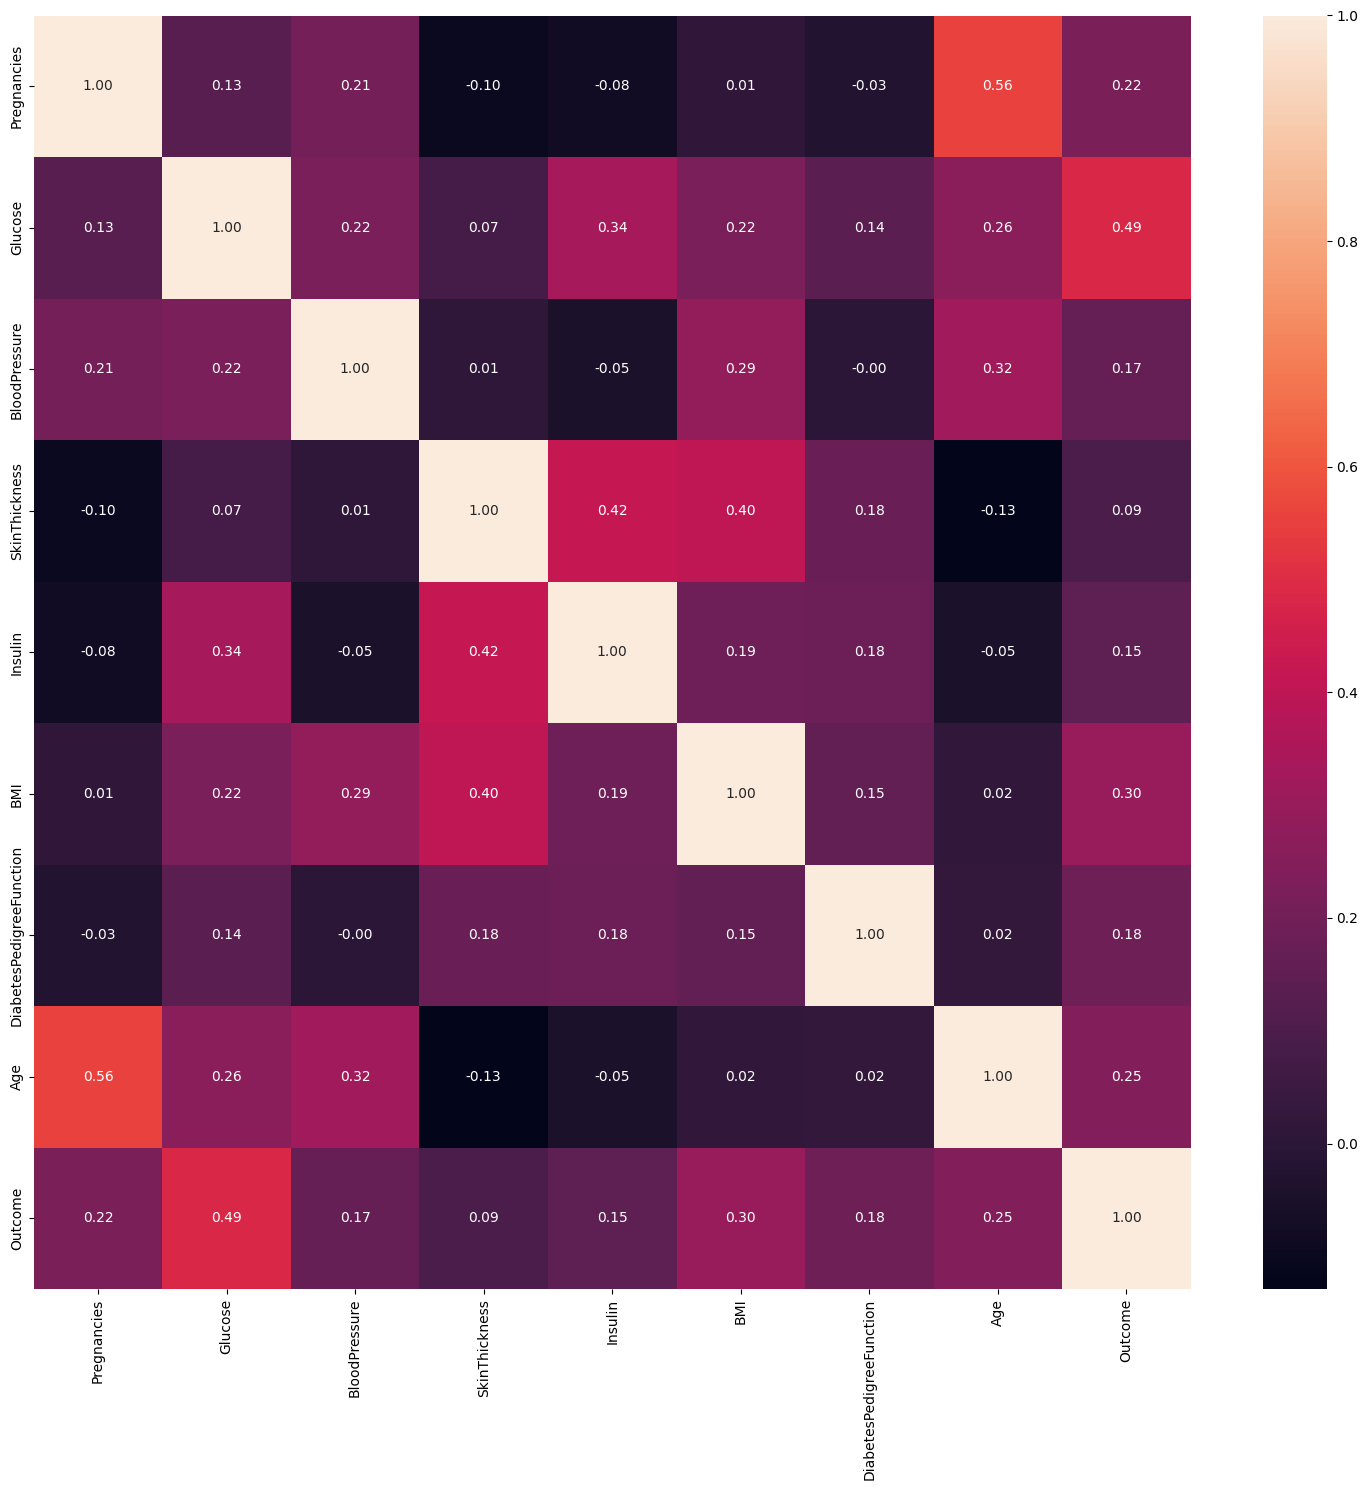

In [8]:
# Heatmap to find correlation to target variable 

fig, axis = plt.subplots(figsize=(15,15))

columns = df.columns

sns.heatmap(df[columns].corr(), annot=True, fmt='.2f')

plt.tight_layout()
plt.show()

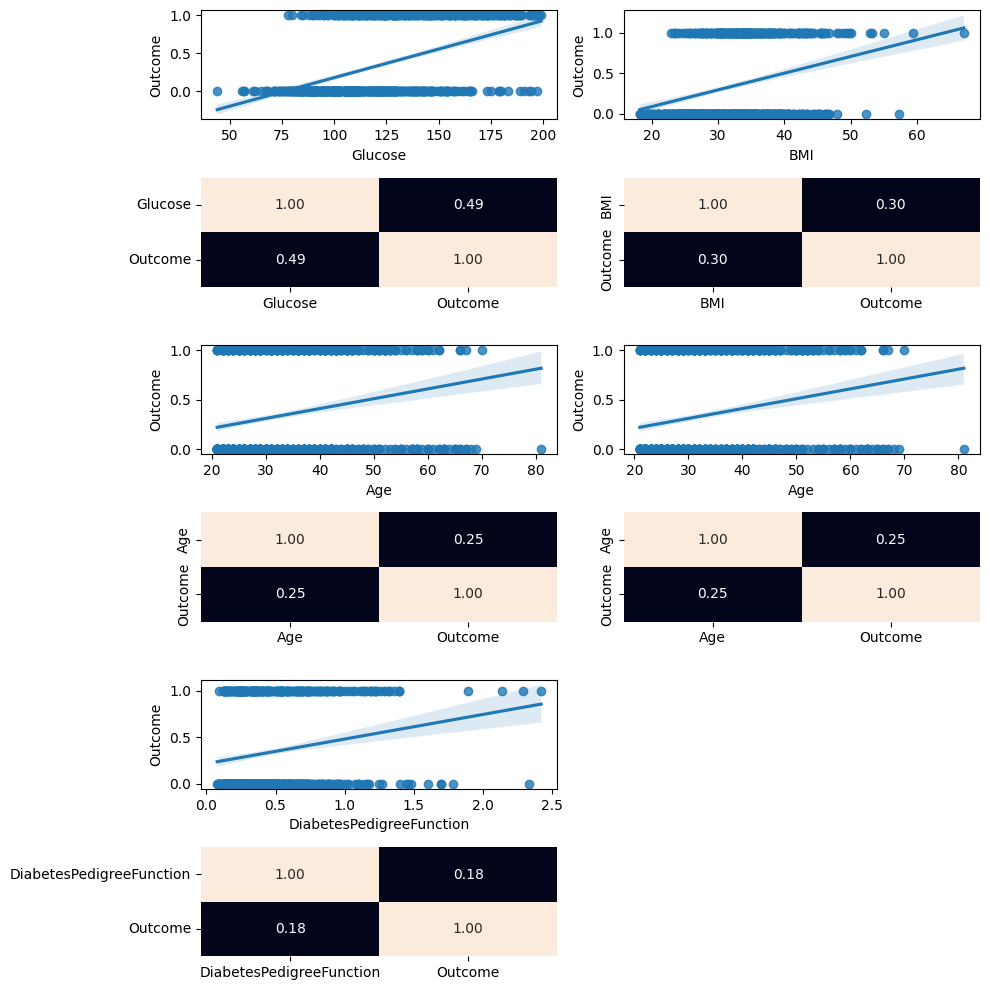

In [9]:
# Regplot to find regression line between variables against target variable

fig, axis = plt.subplots(6, 2, figsize=(10,10))

sns.regplot(ax=axis[0,0], data=df, x="Glucose", y="Outcome", marker='o')
sns.heatmap(df[['Glucose', 'Outcome']].corr(), annot=True, fmt=".2f", ax=axis[1,0], cbar=False)

sns.regplot(ax=axis[0,1], data=df, x="BMI", y="Outcome", marker='o')
sns.heatmap(df[['BMI', 'Outcome']].corr(), annot=True, fmt=".2f", ax=axis[1,1], cbar=False)

sns.regplot(ax=axis[2,0], data=df, x="Age", y="Outcome", marker='o')
sns.heatmap(df[['Age', 'Outcome']].corr(), annot=True, fmt=".2f", ax=axis[3,0], cbar=False)

sns.regplot(ax=axis[2,1], data=df, x="Age", y="Outcome", marker='o')
sns.heatmap(df[['Age', 'Outcome']].corr(), annot=True, fmt=".2f", ax=axis[3,1], cbar=False)

sns.regplot(ax=axis[4,0], data=df, x="DiabetesPedigreeFunction", y="Outcome", marker='o')
sns.heatmap(df[['DiabetesPedigreeFunction', 'Outcome']].corr(), annot=True, fmt=".2f", ax=axis[5,0], cbar=False)

plt.delaxes(axis[4,1])
plt.delaxes(axis[5,1])
plt.tight_layout()
plt.show()

In [10]:
# Stats outcome

stats_outcome = df.Outcome.describe()
stats_outcome

count    724.000000
mean       0.343923
std        0.475344
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

### Parallel Coordinates

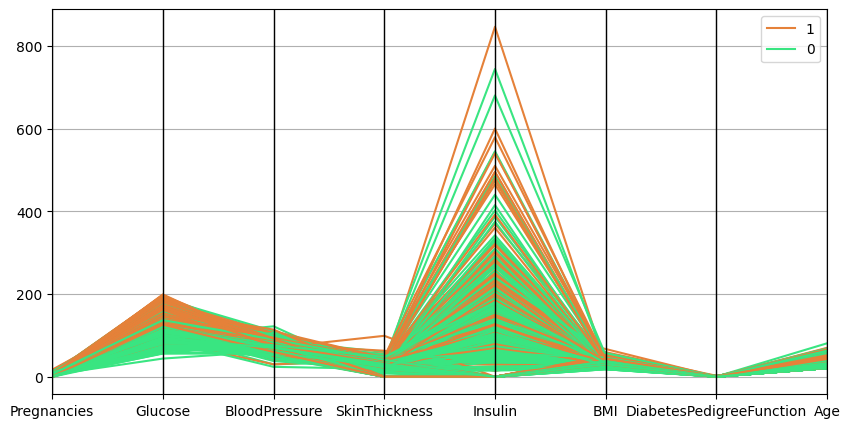

In [11]:
# Parallel Coordiantes 

plt.figure(figsize=(10,5))
pd.plotting.parallel_coordinates(df, 'Outcome', color=("#E58139", "#39E581", "#8139E5"))
plt.show()

### Split Data 

In [12]:
# Split Data
# Change the columns dropped in 'X' to see what will provide the best accuracy

X = df.drop(['Outcome','DiabetesPedigreeFunction'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [13]:
# Split confirmation
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
475,0,137,84,27,0,27.3,59
6,3,78,50,32,88,31.0,26
450,1,82,64,13,95,21.2,23
635,13,104,72,0,0,31.2,38
438,1,97,70,15,0,18.2,21


In [14]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
346,1,139,46,19,83,28.7,22
553,1,88,62,24,44,29.9,23
590,11,111,84,40,0,46.8,45
36,11,138,76,0,0,33.2,35
399,3,193,70,31,0,34.9,25


In [ ]:
# Get y-values and turn into csv files

X_train['Outcome'] = y_train.values
X_test['Outcome'] = y_test.values

X_train.to_csv('../data/diabetes_clean_train.csv')
X_test.to_csv('../data/diabetes_clean_test.csv')

In [18]:
# Train & Test Data

train_data = pd.read_csv('../data/diabetes_clean_train.csv')
test_data = pd.read_csv('../data/diabetes_clean_test.csv')

train_data.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,475,0,137,84,27,0,27.3,59,0
1,6,3,78,50,32,88,31.0,26,1
2,450,1,82,64,13,95,21.2,23,0
3,635,13,104,72,0,0,31.2,38,1
4,438,1,97,70,15,0,18.2,21,0


In [ ]:
# Drop target variable from training data

X_train = train_data.drop(['Outcome'], axis=1)
y_train = train_data['Outcome']
X_test = test_data.drop(['Outcome'], axis = 1)
y_test = test_data['Outcome']

### Decision Tree Classifier

In [ ]:
# Decision Tree Classifying Model

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# y prediction

y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1])

In [ ]:
# Report & Accuracy Score

report = classification_report(y_test, y_pred)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}\n')
print(report)

Accuracy Score: 0.7034482758620689

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       102
           1       0.50      0.56      0.53        43

    accuracy                           0.70       145
   macro avg       0.65      0.66      0.66       145
weighted avg       0.71      0.70      0.71       145



### Model Optimization

In [ ]:
# Search for hyperparameters

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Best hyperparameters

grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
# Optimized Model

opt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=2, random_state=42)
opt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=42)

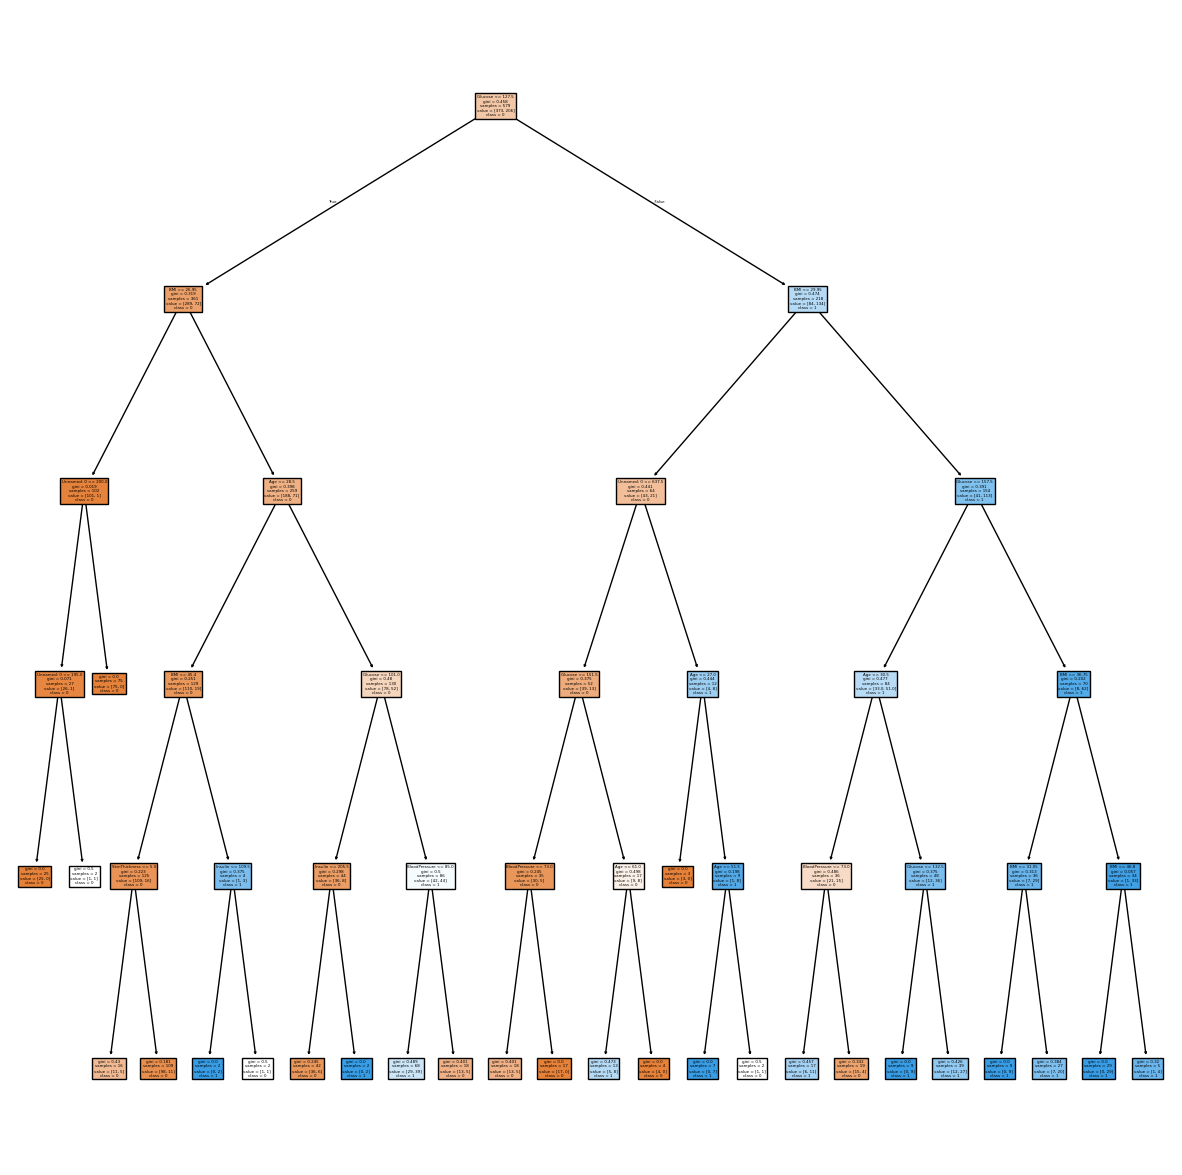

In [ ]:
# Plot model

fig = plt.figure(figsize=(15,15))

tree.plot_tree(opt_model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [ ]:
# Optimized y prediction

opt_y_pred = opt_model.predict(X_test)
opt_y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
# Compare Reports

opt_report = classification_report(y_test, opt_y_pred)
print(f'Optimized Tree Accuracy Score: {accuracy_score(y_test, opt_y_pred)}\n')
print(f'{opt_report}\n\n')

report = classification_report(y_test, y_pred)
print(f'Regular Tree Accuracy Score: {accuracy_score(y_test, y_pred)}\n')
print(report)

Optimized Tree Accuracy Score: 0.8275862068965517

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       102
           1       0.67      0.81      0.74        43

    accuracy                           0.83       145
   macro avg       0.79      0.82      0.80       145
weighted avg       0.84      0.83      0.83       145



Regular Tree Accuracy Score: 0.7034482758620689

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       102
           1       0.50      0.56      0.53        43

    accuracy                           0.70       145
   macro avg       0.65      0.66      0.66       145
weighted avg       0.71      0.70      0.71       145



In [ ]:
# # Save Model

# dump(opt_model, open('predictive_model/diabetes_tree_classifier_random_42.sav', 'wb'))

### Random Forest

In [ ]:
# Get clean train & test data sets

train_data = pd.read_csv("../data/diabetes_clean_train.csv")
test_data = pd.read_csv("../data/diabetes_clean_test.csv")

train_data.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,475,0,137,84,27,0,27.3,59,0
1,6,3,78,50,32,88,31.0,26,1
2,450,1,82,64,13,95,21.2,23,0
3,635,13,104,72,0,0,31.2,38,1
4,438,1,97,70,15,0,18.2,21,0


In [ ]:
# Drop target variable from training data

X_train = train_data.drop(["Outcome", "Unnamed: 0"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome", "Unnamed: 0"], axis = 1)
y_test = test_data["Outcome"]

In [ ]:
# Random Forest Classifying Model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
# y-prediction

y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
# Report and Accuracy Score

report = classification_report(y_test, y_pred)
print(f'Regular Accuracy Score:\n {accuracy_score(y_test, y_pred)}')
print(report)

Regular Accuracy Score:
 0.7931034482758621
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       102
           1       0.65      0.65      0.65        43

    accuracy                           0.79       145
   macro avg       0.75      0.75      0.75       145
weighted avg       0.79      0.79      0.79       145



In [ ]:
# Best Hyperparameters

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto

In [ ]:
# Optimize Model

opt_model = RandomForestClassifier(n_estimators=100 ,max_depth=10, min_samples_leaf=2, min_samples_split=10,max_features='log2', random_state=42)
opt_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

In [ ]:
# Optimized y-prediction

opt_y_pred = opt_model.predict(X_test)
opt_y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
# Compare reports and accuracy scores

opt_report = classification_report(y_test, opt_y_pred)
print(f'Optimized Accuracy Score:\n {accuracy_score(y_test, opt_y_pred)}')
print(opt_report)

report = classification_report(y_test, y_pred)
print(f'Regular Accuracy Score:\n {accuracy_score(y_test, y_pred)}')
print(report)

Optimized Accuracy Score:
 0.8068965517241379
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       102
           1       0.66      0.72      0.69        43

    accuracy                           0.81       145
   macro avg       0.77      0.78      0.77       145
weighted avg       0.81      0.81      0.81       145

Regular Accuracy Score:
 0.7931034482758621
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       102
           1       0.65      0.65      0.65        43

    accuracy                           0.79       145
   macro avg       0.75      0.75      0.75       145
weighted avg       0.79      0.79      0.79       145



In [ ]:
# # Save Model

# dump(opt_model, open('predictive_models/diabetes_random_forest_classifier_random_42.sav', 'wb'))

### Boosting Model XGBoost

In [ ]:
# Train & Test Data

train_data = pd.read_csv("diabetes_clean_train.csv")
test_data = pd.read_csv("diabetes_clean_test.csv")

train_data.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,475,0,137,84,27,0,27.3,59,0
1,6,3,78,50,32,88,31.0,26,1
2,450,1,82,64,13,95,21.2,23,0
3,635,13,104,72,0,0,31.2,38,1
4,438,1,97,70,15,0,18.2,21,0


In [ ]:
# Remove target variable from train data

X_train = train_data.drop(["Outcome", "Unnamed: 0"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome", "Unnamed: 0"], axis = 1)
y_test = test_data["Outcome"]
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,0,137,84,27,0,27.3,59
1,3,78,50,32,88,31.0,26
2,1,82,64,13,95,21.2,23
3,13,104,72,0,0,31.2,38
4,1,97,70,15,0,18.2,21


In [ ]:
# XGBoost Classifier

from xgboost import XGBClassifier

model = XGBClassifier(n_estimators = 2000, learning_rate = 0.001, random_state = 42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# y-prediction

y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
# Report & Accuracy Score

report = classification_report(y_test, y_pred)
print(f'Regular Accuracy Score:\n {accuracy_score(y_test, y_pred)}')
print(report)

Regular Accuracy Score:
 0.8344827586206897
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       102
           1       0.71      0.74      0.73        43

    accuracy                           0.83       145
   macro avg       0.80      0.81      0.80       145
weighted avg       0.84      0.83      0.84       145



In [ ]:
# Best Hyperparameters

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Create the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2],
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, n_iter=50, scoring='accuracy', 
                                   cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model to find the best hyperparameters
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.2s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lamb

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.01

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.5, subsample=0.6; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1, subsample=1.0; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.01, reg_lambda=1.5, subsample=0.8; total time=   0.2s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.01, reg_lambda=1.5, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.01, reg_lambda=1.5, subsample=0.8; total time=   0.2s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.01, reg_lambda=1.5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.01, reg_lambda=1.5, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=0.6; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0.1

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.6; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.6; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, reg_alph

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.6; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1.5, subsample=0.6; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   0.2s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.2s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.2s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, 

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.1, r

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, reg_alp

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lamb

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.01, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.01, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.01, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.01, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1.5, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0.01, reg_lambda=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0.01, reg_lambda=2, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0.01, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, reg_

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0.01, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, reg_al

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.5, subsample=1.0; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, reg_al

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.01, reg_lambda=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, reg_al

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=300, reg

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.1s


/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=300, reg_alp

/workspaces/decision-tree-and-random-forest-project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:50:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# optimized model

best_xgb = random_search.best_estimator_
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# optimized y-prediction

opt_y_pred = best_xgb.predict(X_test)
opt_y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
# Compare reports and accuracy score

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report

opt_report = classification_report(y_test, opt_y_pred)
print(f'Optimized Accuracy Score: {accuracy_score(y_test, opt_y_pred)}\n')
print(opt_report)

report = classification_report(y_test, y_pred)
print(f'Regular Accuracy Score:\n {accuracy_score(y_test, y_pred)}')
print(report)

Optimized Accuracy Score: 0.7862068965517242

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       102
           1       0.73      0.44      0.55        43

    accuracy                           0.79       145
   macro avg       0.76      0.69      0.71       145
weighted avg       0.78      0.79      0.77       145

Regular Accuracy Score:
 0.8344827586206897
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       102
           1       0.71      0.74      0.73        43

    accuracy                           0.83       145
   macro avg       0.80      0.81      0.80       145
weighted avg       0.84      0.83      0.84       145



In [ ]:
# # Save Model

# dump(model, open('diabetes_random_forest_classifier_random_42.sav', 'wb'))